### 추천서비스 로직 만들기

(임시)


일단 데이터 프레임으로 존재한다면.  데이터가 완성되기 전까지 

주식의 종가 = 암호화폐 종가

주식의 거례량 = SNS 감정지수

(각코인별)



날짜 - 시세, 감정지수()

### 구상
- 필요 정보
날짜별 - 시세, 감정지수()

- 추천기준이되는 정보

개인의 투자 기간 n = 예)1주/1달/3달/6달  <--- 주식과 달리 7일,   n= 7,30,90,180

주기는 2*n 로 평균이동선 측정. 왜냐면 저점에서 고점에 판다라고 생각(반주기)  그누구도 고점에사서 고점에 팔지 않기 때문

함수가 필요한 평균이동선 = 2*n

**감정지수 마찬가지 

## I. 패키지 밎 자료 불러오기

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv'

-rw------- 1 root root 165058 Nov  8 06:32 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv'


In [131]:
AAPL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/AAPL.csv')
BABA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/BABA.csv',encoding='cp949')
C = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv', encoding='cp949')
INTC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/INTC.csv', encoding='cp949')
MSFT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/MSFT.csv')
# TSLA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/TSLA.csv')
UGL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/UGL.csv', encoding='cp949')
WFC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/WFC.csv', encoding='cp949')

In [132]:
AAPL.head()

,일자,시가,고가,저가,종가,BB_상한선,거래량
0,20211105,151.890,152.20,150.06,151.28,155.3499,"65,463,883"
1,20211104,151.580,152.43,150.64,150.96,155.2323,"60,394,616"
2,20211103,150.390,151.97,149.82,151.49,155.1252,"54,511,534"
3,20211102,148.660,151.57,148.65,150.02,154.9967,"69,121,987"
4,20211101,148.985,149.70,147.80,148.96,154.9146,"74,588,258"


### 2) 변수 정의

In [133]:
n = [7,30,90,180]
stocks = ['AAPL','BABA','C','INTC','MSFT','UGL','WFC']

## II. 이동평균선 작업

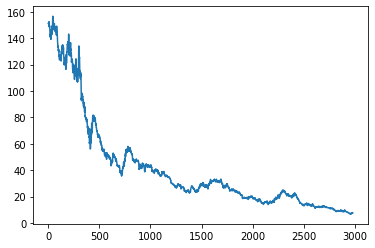

In [134]:
plt.plot(AAPL['종가'])
plt.show()

#그래프는 우리가 보는거에 좌우 반전이나 현 시점에서 그렇게 중요하지 않음

### 1) 이동평균선 코드 만들기

In [135]:
AAPL['이동평균7일']= AAPL['종가'].rolling(window=7).mean().shift(-6)
#shift없이 사용하면 위로 부터 아래로 더해 7일차 아래옆에 값이 사용되 다시 7일 위로 올려주어야 한다.

AAPL.head(10)

,일자,시가,고가,저가,종가,BB_상한선,거래량,이동평균7일
0,20211105,151.890,152.200,150.0600,151.28,155.3499,"65,463,883",150.725714
1,20211104,151.580,152.430,150.6400,150.96,155.2323,"60,394,616",150.378571
2,20211103,150.390,151.970,149.8200,151.49,155.1252,"54,511,534",150.144286
3,20211102,148.660,151.570,148.6500,150.02,154.9967,"69,121,987",149.737143
4,20211101,148.985,149.700,147.8000,148.96,154.9146,"74,588,258",149.547143
5,20211029,147.215,149.940,146.4128,149.80,154.8657,"124,953,168",149.621429
6,20211028,149.820,153.165,149.7200,152.57,154.7877,"100,077,888",149.544286
7,20211027,149.360,149.730,148.4900,148.85,154.5734,"56,094,929",149.000000
8,20211026,149.330,150.840,149.0101,149.32,154.5299,"60,893,395",148.671429
9,20211025,148.680,149.370,147.6211,148.64,154.5192,"50,720,556",148.031429


In [136]:
# AAPL.tail(10)

### 2) 모든 n에 대하여

In [137]:
# for i in n :
#   AAPL['이동평균{0}일'.format(i)]= AAPL['종가'].rolling(window=i).mean().shift(-(i-1))

In [138]:
# AAPL

### 3) 모든 주식에 대하여

In [139]:
# for j in stocks :
#   for i in n:
#     j['이동평균{0}일'.format(i)]= j['종가'].rolling(window=i).mean().shift(-(i-1))

In [140]:
# 일단 수작업으로 진행(나중에 알아보기)
# stocks = ['AAPL','BABA','C','INTC','MSFT','TSLA','UGL','WFC']
for i in n :
  AAPL['이동평균{0}일'.format(i)]= AAPL['종가'].rolling(window=i).mean().shift(-(i-1))
for i in n :
  BABA['이동평균{0}일'.format(i)]= BABA['종가'].rolling(window=i).mean().shift(-(i-1))
for i in n :
  C['이동평균{0}일'.format(i)]= C['종가'].rolling(window=i).mean().shift(-(i-1))  
for i in n :
  INTC['이동평균{0}일'.format(i)]= INTC['종가'].rolling(window=i).mean().shift(-(i-1))
for i in n :
  MSFT['이동평균{0}일'.format(i)]= MSFT['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
  # TSLA['이동평균{0}일'.format(i)]= TSLA['종가'].rolling(window=i).mean().shift(-(i-1))
for i in n :
  UGL['이동평균{0}일'.format(i)]= UGL['종가'].rolling(window=i).mean().shift(-(i-1))
for i in n :
  WFC['이동평균{0}일'.format(i)]= WFC['종가'].rolling(window=i).mean().shift(-(i-1))


In [141]:
WFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   일자        2983 non-null   int64  
 1   시가        2983 non-null   float64
 2   고가        2983 non-null   float64
 3   저가        2983 non-null   float64
 4   종가        2983 non-null   float64
 5   BB_상한선    2919 non-null   float64
 6   거래량       2983 non-null   object 
 7   이동평균7일    2977 non-null   float64
 8   이동평균30일   2954 non-null   float64
 9   이동평균90일   2894 non-null   float64
 10  이동평균180일  2804 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 256.5+ KB


## III.표준편차,Z밸류 작업

In [142]:
AAPL['이동평균7일표준편차']= AAPL['종가'].rolling(window=7).std().shift(-6)

In [143]:
AAPL.head(8)

,일자,시가,고가,저가,종가,BB_상한선,거래량,이동평균7일,이동평균30일,이동평균90일,이동평균180일,이동평균7일표준편차
0,20211105,151.890,152.200,150.0600,151.28,155.3499,"65,463,883",150.725714,146.038667,147.020222,137.173056,1.212461
1,20211104,151.580,152.430,150.6400,150.96,155.2323,"60,394,616",150.378571,145.893333,146.861111,137.032611,1.365521
2,20211103,150.390,151.970,149.8200,151.49,155.1252,"54,511,534",150.144286,145.755667,146.698556,136.915444,1.389615
3,20211102,148.660,151.570,148.6500,150.02,154.9967,"69,121,987",149.737143,145.567667,146.512889,136.794444,1.346461
4,20211101,148.985,149.700,147.8000,148.96,154.9146,"74,588,258",149.547143,145.348000,146.325000,136.687889,1.392931
5,20211029,147.215,149.940,146.4128,149.80,154.8657,"124,953,168",149.621429,145.147333,146.152222,136.600278,1.370078
6,20211028,149.820,153.165,149.7200,152.57,154.7877,"100,077,888",149.544286,145.022667,145.973333,136.520111,1.373546
7,20211027,149.360,149.730,148.4900,148.85,154.5734,"56,094,929",149.000000,144.896667,145.766778,136.423222,0.343074


In [144]:
AAPL['오늘종가기준이동평균7일z밸류'] = (AAPL['종가']-AAPL['이동평균7일'])/(AAPL['이동평균7일표준편차'])

In [145]:
AAPL.head()

,일자,시가,고가,저가,종가,BB_상한선,거래량,이동평균7일,이동평균30일,이동평균90일,이동평균180일,이동평균7일표준편차,오늘종가기준이동평균7일z밸류
0,20211105,151.890,152.20,150.06,151.28,155.3499,"65,463,883",150.725714,146.038667,147.020222,137.173056,1.212461,0.457158
1,20211104,151.580,152.43,150.64,150.96,155.2323,"60,394,616",150.378571,145.893333,146.861111,137.032611,1.365521,0.425792
2,20211103,150.390,151.97,149.82,151.49,155.1252,"54,511,534",150.144286,145.755667,146.698556,136.915444,1.389615,0.968408
3,20211102,148.660,151.57,148.65,150.02,154.9967,"69,121,987",149.737143,145.567667,146.512889,136.794444,1.346461,0.210075
4,20211101,148.985,149.70,147.80,148.96,154.9146,"74,588,258",149.547143,145.348000,146.325000,136.687889,1.392931,-0.421516
